In [ ]:
# 1DECISION TREE REGRESSOR


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Assuming 'X' contains your features and 'y' contains your target variables
# Replace 'X' and 'y' with your actual feature and target variable data
#X = df.drop(columns=['Imitation', 'Taste, smell, and touch response and use', 'Fear or nervous',
#                     'Verbal communication', 'Activity level', 'Level and consistency of intellectual response'])  # Drop target variables from features
y_imitation = df['Imitation']
y_response = df['Taste, smell, and touch response and use']
y_fear = df['Fear or nervous']
y_verbal = df['Verbal communication']
y_activity = df['Activity level']
y_level = df['Level and consistency of intellectual response']

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Perform k-fold cross-validation for each target variable
# Specify the number of folds (e.g., k=5 for 5-fold cross-validation)
k = 5

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation = cross_val_score(regressor, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response = cross_val_score(regressor, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear = cross_val_score(regressor, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal = cross_val_score(regressor, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity = cross_val_score(regressor, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level = cross_val_score(regressor, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation = -mse_scores_imitation
mse_scores_response = -mse_scores_response
mse_scores_fear = -mse_scores_fear
mse_scores_verbal = -mse_scores_verbal
mse_scores_activity = -mse_scores_activity
mse_scores_level = -mse_scores_level

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation = np.mean(mse_scores_imitation)
std_mse_imitation = np.std(mse_scores_imitation)
mean_mse_response = np.mean(mse_scores_response)
std_mse_response = np.std(mse_scores_response)
mean_mse_fear = np.mean(mse_scores_fear)
std_mse_fear = np.std(mse_scores_fear)
mean_mse_verbal = np.mean(mse_scores_verbal)
std_mse_verbal = np.std(mse_scores_verbal)
mean_mse_activity = np.mean(mse_scores_activity)
std_mse_activity = np.std(mse_scores_activity)
mean_mse_level = np.mean(mse_scores_level)
std_mse_level = np.std(mse_scores_level)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using Decision Tree Regressor")
print("Mean MSE for Imitation:", mean_mse_imitation)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response)
print("Mean MSE for Fear or nervous:", mean_mse_fear)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear)
print("Mean MSE for Verbal communication:", mean_mse_verbal)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal)
print("Mean MSE for Activity level:", mean_mse_activity)
print("Standard Deviation of MSE for Activity level:", std_mse_activity)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

In [ ]:
#SVM :RBF


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)



from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Create SVR with RBF kernel
svr_model = SVR(kernel='rbf')

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation = cross_val_score(svr_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response = cross_val_score(svr_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear = cross_val_score(svr_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal = cross_val_score(svr_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity = cross_val_score(svr_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level = cross_val_score(svr_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation = -mse_scores_imitation
mse_scores_response = -mse_scores_response
mse_scores_fear = -mse_scores_fear
mse_scores_verbal = -mse_scores_verbal
mse_scores_activity = -mse_scores_activity
mse_scores_level = -mse_scores_level

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_DT = np.mean(mse_scores_imitation)
std_mse_imitation_DT = np.std(mse_scores_imitation)
mean_mse_response_DT = np.mean(mse_scores_response)
std_mse_response_DT = np.std(mse_scores_response)
mean_mse_fear_DT = np.mean(mse_scores_fear)
std_mse_fear_DT = np.std(mse_scores_fear)
mean_mse_verbal_DT = np.mean(mse_scores_verbal)
std_mse_verbal_DT = np.std(mse_scores_verbal)
mean_mse_activity_DT = np.mean(mse_scores_activity)
std_mse_activity_DT = np.std(mse_scores_activity)
mean_mse_level_DT = np.mean(mse_scores_level)
std_mse_level_DT = np.std(mse_scores_level)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using SVR with RBF Kernel")
print("Mean MSE for Imitation:", mean_mse_imitation_DT)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_DT)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_DT)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_DT)
print("Mean MSE for Fear or nervous:", mean_mse_fear_DT)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_DT)
print("Mean MSE for Verbal communication:", mean_mse_verbal_DT)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_DT)
print("Mean MSE for Activity level:", mean_mse_activity_DT)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_DT)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_DT)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_DT)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

In [ ]:
#SVM LINEAR
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)




from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Create SVR with linear kernel
svr_model_linear = SVR(kernel='linear')

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_linear = cross_val_score(svr_model_linear, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_linear = cross_val_score(svr_model_linear, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_linear = cross_val_score(svr_model_linear, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_linear = cross_val_score(svr_model_linear, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_linear = cross_val_score(svr_model_linear, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_linear = cross_val_score(svr_model_linear, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_linear = -mse_scores_imitation_linear
mse_scores_response_linear = -mse_scores_response_linear
mse_scores_fear_linear = -mse_scores_fear_linear
mse_scores_verbal_linear = -mse_scores_verbal_linear
mse_scores_activity_linear = -mse_scores_activity_linear
mse_scores_level_linear = -mse_scores_level_linear

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_linear = np.mean(mse_scores_imitation_linear)
std_mse_imitation_linear = np.std(mse_scores_imitation_linear)
mean_mse_response_linear = np.mean(mse_scores_response_linear)
std_mse_response_linear = np.std(mse_scores_response_linear)
mean_mse_fear_linear = np.mean(mse_scores_fear_linear)
std_mse_fear_linear = np.std(mse_scores_fear_linear)
mean_mse_verbal_linear = np.mean(mse_scores_verbal_linear)
std_mse_verbal_linear = np.std(mse_scores_verbal_linear)
mean_mse_activity_linear = np.mean(mse_scores_activity_linear)
std_mse_activity_linear = np.std(mse_scores_activity_linear)
mean_mse_level_linear = np.mean(mse_scores_level_linear)
std_mse_level_linear = np.std(mse_scores_level_linear)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using SVR with Linear Kernel")
print("Mean MSE for Imitation:", mean_mse_imitation_linear)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_linear)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_linear)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_linear)
print("Mean MSE for Fear or nervous:", mean_mse_fear_linear)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_linear)
print("Mean MSE for Verbal communication:", mean_mse_verbal_linear)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_linear)
print("Mean MSE for Activity level:", mean_mse_activity_linear)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_linear)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_linear)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_linear)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

In [ ]:
#Gradient boosting
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Create Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_gb = cross_val_score(gb_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_gb = cross_val_score(gb_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_gb = cross_val_score(gb_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_gb = cross_val_score(gb_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_gb = cross_val_score(gb_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_gb = cross_val_score(gb_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_gb = -mse_scores_imitation_gb
mse_scores_response_gb = -mse_scores_response_gb
mse_scores_fear_gb = -mse_scores_fear_gb
mse_scores_verbal_gb = -mse_scores_verbal_gb
mse_scores_activity_gb = -mse_scores_activity_gb
mse_scores_level_gb = -mse_scores_level_gb

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_gb = np.mean(mse_scores_imitation_gb)
std_mse_imitation_gb = np.std(mse_scores_imitation_gb)
mean_mse_response_gb = np.mean(mse_scores_response_gb)
std_mse_response_gb = np.std(mse_scores_response_gb)
mean_mse_fear_gb = np.mean(mse_scores_fear_gb)
std_mse_fear_gb = np.std(mse_scores_fear_gb)
mean_mse_verbal_gb = np.mean(mse_scores_verbal_gb)
std_mse_verbal_gb = np.std(mse_scores_verbal_gb)
mean_mse_activity_gb = np.mean(mse_scores_activity_gb)
std_mse_activity_gb = np.std(mse_scores_activity_gb)
mean_mse_level_gb = np.mean(mse_scores_level_gb)
std_mse_level_gb = np.std(mse_scores_level_gb)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using Gradient Boosting Regressor")
print("Mean MSE for Imitation:", mean_mse_imitation_gb)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_gb)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_gb)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_gb)
print("Mean MSE for Fear or nervous:", mean_mse_fear_gb)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_gb)
print("Mean MSE for Verbal communication:", mean_mse_verbal_gb)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_gb)
print("Mean MSE for Activity level:", mean_mse_activity_gb)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_gb)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_gb)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_gb)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

In [ ]:
#xgboost
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)

import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Create XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_xgb = cross_val_score(xgb_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_xgb = cross_val_score(xgb_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_xgb = cross_val_score(xgb_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_xgb = cross_val_score(xgb_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_xgb = cross_val_score(xgb_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_xgb = cross_val_score(xgb_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_xgb = -mse_scores_imitation_xgb
mse_scores_response_xgb = -mse_scores_response_xgb
mse_scores_fear_xgb = -mse_scores_fear_xgb
mse_scores_verbal_xgb = -mse_scores_verbal_xgb
mse_scores_activity_xgb = -mse_scores_activity_xgb
mse_scores_level_xgb = -mse_scores_level_xgb

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_xgb = np.mean(mse_scores_imitation_xgb)
std_mse_imitation_xgb = np.std(mse_scores_imitation_xgb)
mean_mse_response_xgb = np.mean(mse_scores_response_xgb)
std_mse_response_xgb = np.std(mse_scores_response_xgb)
mean_mse_fear_xgb = np.mean(mse_scores_fear_xgb)
std_mse_fear_xgb = np.std(mse_scores_fear_xgb)
mean_mse_verbal_xgb = np.mean(mse_scores_verbal_xgb)
std_mse_verbal_xgb = np.std(mse_scores_verbal_xgb)
mean_mse_activity_xgb = np.mean(mse_scores_activity_xgb)
std_mse_activity_xgb = np.std(mse_scores_activity_xgb)
mean_mse_level_xgb = np.mean(mse_scores_level_xgb)
std_mse_level_xgb = np.std(mse_scores_level_xgb)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using XGBoost Regressor")
print("Mean MSE for Imitation:", mean_mse_imitation_xgb)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_xgb)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_xgb)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_xgb)
print("Mean MSE for Fear or nervous:", mean_mse_fear_xgb)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_xgb)
print("Mean MSE for Verbal communication:", mean_mse_verbal_xgb)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_xgb)
print("Mean MSE for Activity level:", mean_mse_activity_xgb)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_xgb)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_xgb)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

In [ ]:
#KNN
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Create KNN Regressor
knn_model = KNeighborsRegressor()

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_knn = cross_val_score(knn_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_knn = cross_val_score(knn_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_knn = cross_val_score(knn_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_knn = cross_val_score(knn_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_knn = cross_val_score(knn_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_knn = cross_val_score(knn_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_knn = -mse_scores_imitation_knn
mse_scores_response_knn = -mse_scores_response_knn
mse_scores_fear_knn = -mse_scores_fear_knn
mse_scores_verbal_knn = -mse_scores_verbal_knn
mse_scores_activity_knn = -mse_scores_activity_knn
mse_scores_level_knn = -mse_scores_level_knn

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_knn = np.mean(mse_scores_imitation_knn)
std_mse_imitation_knn = np.std(mse_scores_imitation_knn)
mean_mse_response_knn = np.mean(mse_scores_response_knn)
std_mse_response_knn = np.std(mse_scores_response_knn)
mean_mse_fear_knn = np.mean(mse_scores_fear_knn)
std_mse_fear_knn = np.std(mse_scores_fear_knn)
mean_mse_verbal_knn = np.mean(mse_scores_verbal_knn)
std_mse_verbal_knn = np.std(mse_scores_verbal_knn)
mean_mse_activity_knn = np.mean(mse_scores_activity_knn)
std_mse_activity_knn = np.std(mse_scores_activity_knn)
mean_mse_level_knn = np.mean(mse_scores_level_knn)
std_mse_level_knn = np.std(mse_scores_level_knn)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using K-Nearest Neighbors (KNN)")
print("Mean MSE for Imitation:", mean_mse_imitation_knn)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_knn)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_knn)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_knn)
print("Mean MSE for Fear or nervous:", mean_mse_fear_knn)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_knn)
print("Mean MSE for Verbal communication:", mean_mse_verbal_knn)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_knn)
print("Mean MSE for Activity level:", mean_mse_activity_knn)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_knn)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_knn)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_knn)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

In [ ]:
#SNN
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)




from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create SNN Regressor
snn_model = MLPRegressor(random_state=42)

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_snn = cross_val_score(snn_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_snn = cross_val_score(snn_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_snn = cross_val_score(snn_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_snn = cross_val_score(snn_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_snn = cross_val_score(snn_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_snn = cross_val_score(snn_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_snn = -mse_scores_imitation_snn
mse_scores_response_snn = -mse_scores_response_snn
mse_scores_fear_snn = -mse_scores_fear_snn
mse_scores_verbal_snn = -mse_scores_verbal_snn
mse_scores_activity_snn = -mse_scores_activity_snn
mse_scores_level_snn = -mse_scores_level_snn

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_snn = np.mean(mse_scores_imitation_snn)
std_mse_imitation_snn = np.std(mse_scores_imitation_snn)
mean_mse_response_snn = np.mean(mse_scores_response_snn)
std_mse_response_snn = np.std(mse_scores_response_snn)
mean_mse_fear_snn = np.mean(mse_scores_fear_snn)
std_mse_fear_snn = np.std(mse_scores_fear_snn)
mean_mse_verbal_snn = np.mean(mse_scores_verbal_snn)
std_mse_verbal_snn = np.std(mse_scores_verbal_snn)
mean_mse_activity_snn = np.mean(mse_scores_activity_snn)
std_mse_activity_snn = np.std(mse_scores_activity_snn)
mean_mse_level_snn = np.mean(mse_scores_level_snn)
std_mse_level_snn = np.std(mse_scores_level_snn)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using Stochastic Neural Network (SNN)")
print("Mean MSE for Imitation:", mean_mse_imitation_snn)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_snn)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_snn)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_snn)
print("Mean MSE for Fear or nervous:", mean_mse_fear_snn)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_snn)
print("Mean MSE for Verbal communication:", mean_mse_verbal_snn)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_snn)
print("Mean MSE for Activity level:", mean_mse_activity_snn)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_snn)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_snn)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_snn)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Predictive model using Stochastic Neural Network (SNN)
Mean MSE for Imitation: 0.6059045105914581
Standard Deviation of MSE for Imitation: 0.07073089978057738
Mean MSE for Taste, smell, and touch response and use: 0.6730977234129292
Standard Deviation of MSE for Taste, smell, and touch response and use: 0.07778842738415351
Mean MSE for Fear or nervous: 0.7760454526997356
Standard Deviation of MSE for Fear or nervous: 0.1823523557195762
Mean MSE for Verbal communication: 0.874824769473617
Standard Deviation of MSE for Verbal communication: 0.15354407811972284
Mean MSE for Activity level: 0.7893416757704574
Standard Deviation of MSE for Activity level: 0.11236802229113127
Mean MSE for Level and consistency of intellectual response: 0.741244469491372
Standard Deviation of MSE for Level and consistency of intellectual response: 0.06434613867172952


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#DNN
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)



from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create DNN Regressor
dnn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_dnn = cross_val_score(dnn_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_dnn = cross_val_score(dnn_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_dnn = cross_val_score(dnn_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_dnn = cross_val_score(dnn_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_dnn = cross_val_score(dnn_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_dnn = cross_val_score(dnn_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_dnn = -mse_scores_imitation_dnn
mse_scores_response_dnn = -mse_scores_response_dnn
mse_scores_fear_dnn = -mse_scores_fear_dnn
mse_scores_verbal_dnn = -mse_scores_verbal_dnn
mse_scores_activity_dnn = -mse_scores_activity_dnn
mse_scores_level_dnn = -mse_scores_level_dnn

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_dnn = np.mean(mse_scores_imitation_dnn)
std_mse_imitation_dnn = np.std(mse_scores_imitation_dnn)
mean_mse_response_dnn = np.mean(mse_scores_response_dnn)
std_mse_response_dnn = np.std(mse_scores_response_dnn)
mean_mse_fear_dnn = np.mean(mse_scores_fear_dnn)
std_mse_fear_dnn = np.std(mse_scores_fear_dnn)
mean_mse_verbal_dnn = np.mean(mse_scores_verbal_dnn)
std_mse_verbal_dnn = np.std(mse_scores_verbal_dnn)
mean_mse_activity_dnn = np.mean(mse_scores_activity_dnn)
std_mse_activity_dnn = np.std(mse_scores_activity_dnn)
mean_mse_level_dnn = np.mean(mse_scores_level_dnn)
std_mse_level_dnn = np.std(mse_scores_level_dnn)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using Deep Neural Network (DNN)")
print("Mean MSE for Imitation:", mean_mse_imitation_dnn)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_dnn)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_dnn)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_dnn)
print("Mean MSE for Fear or nervous:", mean_mse_fear_dnn)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_dnn)
print("Mean MSE for Verbal communication:", mean_mse_verbal_dnn)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_dnn)
print("Mean MSE for Activity level:", mean_mse_activity_dnn)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_dnn)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_dnn)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_dnn)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Predictive model using Deep Neural Network (DNN)
Mean MSE for Imitation: 0.888601839388989
Standard Deviation of MSE for Imitation: 0.11110523530969113
Mean MSE for Taste, smell, and touch response and use: 0.9463493360981066
Standard Deviation of MSE for Taste, smell, and touch response and use: 0.09894019093588662
Mean MSE for Fear or nervous: 0.9658561888774437
Standard Deviation of MSE for Fear or nervous: 0.1888151164873704
Mean MSE for Verbal communication: 1.0502566532963915
Standard Deviation of MSE for Verbal communication: 0.20158919524296487
Mean MSE for Activity level: 0.9936054084979198
Standard Deviation of MSE for Activity level: 0.035715660154209704
Mean MSE for Level and consistency of intellectual response: 0.9539252274436908
Standard Deviation of MSE for Level and consistency of intellectual response: 0.1108500533780171


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#DNN
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/content/Final_Dataset.csv', encoding='latin-1')

# Define the standardized column names
standardized_columns = [ 'Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
                        'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
                        'Socio-economic status', "Father's education level", "Mother's education level",
                        "Father's occupation", "Mother's occupation", 'Family types',
                        'Family history of autism disorder', 'Father illness', 'Consanguinity',
                        'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                        'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                        'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                        'Type of delivery', 'Imitation', 'Emotional response', 'Visual response',
                        'Listening response', 'Taste, smell, and touch response and use',
                        'Fear or nervous', 'Verbal communication', 'Activity level',
                        'Level and consistency of intellectual response', 'General impressions']

# Rename columns
df.columns = standardized_columns

# Perform one-hot encoding for 'Gender'
encoder = OneHotEncoder(drop='first', sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=[f'Gender_{i}' for i in range(gender_encoded.shape[1])])
df = pd.concat([df, gender_encoded_df], axis=1)

# Drop the original 'Gender' column
df.drop(columns=['Gender'], inplace=True)

# Now 'Gender' is one-hot encoded and the DataFrame is ready for further processing



# Preprocess 'Birth weight' column
df['Birth weight'] = df['Birth weight'].replace('?', pd.NA)
df['Birth weight'] = pd.to_numeric(df['Birth weight'], errors='coerce')
mean_birth_weight = df['Birth weight'].mean()
df['Birth weight'] = df['Birth weight'].fillna(mean_birth_weight)
df['Birth weight'] = pd.cut(df['Birth weight'], bins=[float('-inf'), 2.5, float('inf')], labels=['< 2.5kg', '>= 2.5kg'], right=False)

# Preprocess binary categorical columns
binary_categorical_columns = ['Birth asphyxia', 'Breastfeeding', 'Premature birth', 'Father illness',
                              'Consanguinity', 'Threatened abortion <20 weeks', 'Specific illness during pregnancy',
                              'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
                              'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
                              'Imitation', 'Fear or nervous', 'Verbal communication']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 1, 'Later born': 0})

# Preprocessing for Breastfeeding
df['Breastfeeding'] = df['Breastfeeding'].replace('?', pd.NA)  # Replace '?' with NaN
df['Breastfeeding'] = df['Breastfeeding'].map({'> 12 months': 1, '6 to 12 months': 2, '< 6 months': 3})  # Mapping categories to numerical values

# Preprocessing for Father's age at birth
df["Father's age at birth"] = pd.to_numeric(df["Father's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Father's age at birth"].fillna(df["Father's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocessing for Mother's age at birth
df["Mother's age at birth"] = pd.to_numeric(df["Mother's age at birth"].str.extract(r'(\d+)', expand=False), errors='coerce')  # Extract numeric part and convert to numeric
df["Mother's age at birth"].fillna(df["Mother's age at birth"].mean(), inplace=True)  # Impute missing values with mean

# Preprocess 'Birth order' column
df['Birth order'] = df['Birth order'].replace({'First-borns': 2, 'Middle born': 1, 'Later born': 0})

# Define mapping dictionary for education levels
education_mapping = {
    'Higher education': 0,
    'Graduate': 1,
    'Higher secondary level': 2,
    'Secondary level': 3,
    'Less than secondary level': 4
}
# Preprocess 'Father's education level'
df["Father's education level"] = df["Father's education level"].map(education_mapping)

# Preprocess 'Mother's education level'
df["Mother's education level"] = df["Mother's education level"].map(education_mapping)

# Drop Father's occupation and Mother's occupation columns
df.drop(columns=["Father's occupation", "Mother's occupation"], inplace=True)

# Encode 'Family types' column using one-hot encoding
family_types_encoded = pd.get_dummies(df['Family types'], drop_first=True)
df = pd.concat([df, family_types_encoded], axis=1)
df.drop(columns=['Family types'], inplace=True)

# Preprocess binary categorical columns
binary_categorical_columns = ['Premature birth', 'Birth asphyxia']
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})


# Map the categories to numerical values
family_history_mapping = {
    'No family history of ASD': 0,
    'Sibling history of ASD': 1,
    'Family history of ASD': 2
}

# Preprocess 'Family history of autism disorder' column
df['Family history of autism disorder'] = df['Family history of autism disorder'].map(family_history_mapping)

# Drop the 'Father illness' column
df.drop(columns=['Father illness'], inplace=True)


binary_categorical_columns = ['Threatened abortion <20 weeks', 'Psychological stress during pregnancy',
                              'Maternal drug use during pregnancy', 'Poor nutrition during pregnancy',
                              'Vitamin D deficit', 'Mineral deficiencies']

# Replace 'Yes' with 1 and 'No' with 0 in binary categorical columns
df[binary_categorical_columns] = df[binary_categorical_columns].replace({'Yes': 1, 'No': 0})

print(df[binary_categorical_columns].head())

# Define mapping dictionary for type of delivery
delivery_mapping = {
    'Vaginal delivery': 0,
    'Cesarean section': 1
}

# Preprocess 'Type of delivery' column
df['Type of delivery'] = df['Type of delivery'].map(delivery_mapping)

print(df['Type of delivery'].head())


# Define mapping dictionary for response and activity levels
response_mapping = {
    'Normal': 0,
    'Mildly abnormal': 1,
    'Moderately abnormal': 2,
    'Severely abnormal': 3
}

# Preprocess the columns
response_columns = ['Imitation', 'Emotional response', 'Visual response', 'Listening response',
                    'Taste, smell, and touch response and use', 'Fear or nervous',
                    'Verbal communication', 'Activity level', 'Level and consistency of intellectual response',
                    'General impressions']

for column in response_columns:
    df[column] = df[column].map(response_mapping)

print(df[response_columns].head())


from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X= ['Gender', 'Age', 'Birth weight', 'Birth order', 'Premature birth',
            'Birth asphyxia', 'Breastfeeding', "Father's age at birth", "Mother's age at birth",
            'Socio-economic status', "Father's education level", "Mother's education level", 'Family types',
            'Family history of autism disorder',  'Consanguinity',
            'Threatened abortion <20 weeks',
            'Psychological stress during pregnancy', 'Maternal drug use during pregnancy',
            'Poor nutrition during pregnancy', 'Vitamin D deficit', 'Mineral deficiencies',
            'Type of delivery', 'Imitation']





# Print the contents of X and y
print("Contents of X:", X)
print("Contents of y:", y)

import numpy as np

# Number of samples
num_samples = 404

# Number of input features
num_input_features = 23

# Number of output features
num_output_features = 3

# Generate synthetic input data (random numbers)
X = np.random.rand(num_samples, num_input_features)

# Generate synthetic output data (random numbers)
# Here, we assume output features are also random, you can replace it with actual data
y = np.random.rand(num_samples, num_output_features)

# Print the shapes of X and y to verify
print("Shape of X (input):", X.shape)  # Should be (num_samples, num_input_features)
print("Shape of y (output):", y.shape)  # Should be (num_samples, num_output_features)


from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train (training input):", X_train.shape)
print("Shape of X_test (testing input):", X_test.shape)
print("Shape of y_train (training output):", y_train.shape)
print("Shape of y_test (testing output):", y_test.shape)
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create DNN Regressor
dnn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
mse_scores_imitation_dnn = cross_val_score(dnn_model, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response_dnn = cross_val_score(dnn_model, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear_dnn = cross_val_score(dnn_model, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal_dnn = cross_val_score(dnn_model, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity_dnn = cross_val_score(dnn_model, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level_dnn = cross_val_score(dnn_model, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation_dnn = -mse_scores_imitation_dnn
mse_scores_response_dnn = -mse_scores_response_dnn
mse_scores_fear_dnn = -mse_scores_fear_dnn
mse_scores_verbal_dnn = -mse_scores_verbal_dnn
mse_scores_activity_dnn = -mse_scores_activity_dnn
mse_scores_level_dnn = -mse_scores_level_dnn

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_dnn = np.mean(mse_scores_imitation_dnn)
std_mse_imitation_dnn = np.std(mse_scores_imitation_dnn)
mean_mse_response_dnn = np.mean(mse_scores_response_dnn)
std_mse_response_dnn = np.std(mse_scores_response_dnn)
mean_mse_fear_dnn = np.mean(mse_scores_fear_dnn)
std_mse_fear_dnn = np.std(mse_scores_fear_dnn)
mean_mse_verbal_dnn = np.mean(mse_scores_verbal_dnn)
std_mse_verbal_dnn = np.std(mse_scores_verbal_dnn)
mean_mse_activity_dnn = np.mean(mse_scores_activity_dnn)
std_mse_activity_dnn = np.std(mse_scores_activity_dnn)
mean_mse_level_dnn = np.mean(mse_scores_level_dnn)
std_mse_level_dnn = np.std(mse_scores_level_dnn)

# Print the mean and standard deviation of MSE scores for each target variable
print("Predictive model using Deep Neural Network (DNN)")
print("Mean MSE for Imitation:", mean_mse_imitation_dnn)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation_dnn)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response_dnn)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response_dnn)
print("Mean MSE for Fear or nervous:", mean_mse_fear_dnn)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear_dnn)
print("Mean MSE for Verbal communication:", mean_mse_verbal_dnn)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal_dnn)
print("Mean MSE for Activity level:", mean_mse_activity_dnn)
print("Standard Deviation of MSE for Activity level:", std_mse_activity_dnn)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level_dnn)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level_dnn)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Threatened abortion <20 weeks  Psychological stress during pregnancy  \
0                              0                                      1   
1                              0                                      1   
2                              0                                      1   
3                              0                                      1   
4                              0                                      1   

   Maternal drug use during pregnancy  Poor nutrition during pregnancy  \
0                                   1                                0   
1                                   1                                0   
2                                   0                                1   
3                                   0                                1   
4                                   1                                0   

   Vitamin D deficit  Mineral deficiencies  
0                  0                     0  
1             

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Predictive model using Deep Neural Network (DNN)
Mean MSE for Imitation: 0.9023845541927022
Standard Deviation of MSE for Imitation: 0.07386338027526441
Mean MSE for Taste, smell, and touch response and use: 0.9616395029597467
Standard Deviation of MSE for Taste, smell, and touch response and use: 0.060337280211093726
Mean MSE for Fear or nervous: 0.9934296883597817
Standard Deviation of MSE for Fear or nervous: 0.1455701329373537
Mean MSE for Verbal communication: 1.338730561071488
Standard Deviation of MSE for Verbal communication: 0.38729353115208215
Mean MSE for Activity level: 1.046634271572604
Standard Deviation of MSE for Activity level: 0.19277706430583508
Mean MSE for Level and consistency of intellectual response: 1.102331803488461
Standard Deviation of MSE for Level and consistency of intellectual response: 0.08609980619275011


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LASSO RIDGE

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge


# Now, you can integrate the Lasso and Ridge regression models


# Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Perform k-fold cross-validation for each target variable and calculate mean squared error (MSE) as the scoring metric
k = 5
mse_scores_imitation = cross_val_score(regressor, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_response = cross_val_score(regressor, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear = cross_val_score(regressor, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal = cross_val_score(regressor, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity = cross_val_score(regressor, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_level = cross_val_score(regressor, X, y_level, cv=k, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_imitation = -mse_scores_imitation
mse_scores_response = -mse_scores_response
mse_scores_fear = -mse_scores_fear
mse_scores_verbal = -mse_scores_verbal
mse_scores_activity = -mse_scores_activity
mse_scores_level = -mse_scores_level

# Calculate the mean and standard deviation of MSE scores for each target variable
mean_mse_imitation_LR = np.mean(mse_scores_imitation)
std_mse_imitation_LR = np.std(mse_scores_imitation)
mean_mse_response_LR = np.mean(mse_scores_response)
std_mse_response_LR = np.std(mse_scores_response)
mean_mse_fear_LR = np.mean(mse_scores_fear)
std_mse_fear_LR = np.std(mse_scores_fear)
mean_mse_verbal_LR = np.mean(mse_scores_verbal)
std_mse_verbal_LR = np.std(mse_scores_verbal)
mean_mse_activity_LR = np.mean(mse_scores_activity)
std_mse_activity_LR = np.std(mse_scores_activity)
mean_mse_level_LR = np.mean(mse_scores_level)
std_mse_level_LR = np.std(mse_scores_level)

# Print the mean and standard deviation of MSE scores for each target variable
print("Mean MSE for Imitation:", mean_mse_imitation)
print("Standard Deviation of MSE for Imitation:", std_mse_imitation)
print("Mean MSE for Taste, smell, and touch response and use:", mean_mse_response)
print("Standard Deviation of MSE for Taste, smell, and touch response and use:", std_mse_response)
print("Mean MSE for Fear or nervous:", mean_mse_fear)
print("Standard Deviation of MSE for Fear or nervous:", std_mse_fear)
print("Mean MSE for Verbal communication:", mean_mse_verbal)
print("Standard Deviation of MSE for Verbal communication:", std_mse_verbal)
print("Mean MSE for Activity level:", mean_mse_activity)
print("Standard Deviation of MSE for Activity level:", std_mse_activity)
print("Mean MSE for Level and consistency of intellectual response:", mean_mse_level)
print("Standard Deviation of MSE for Level and consistency of intellectual response:", std_mse_level)

# Lasso Regression
lasso_regressor = Lasso(alpha=0.1)
mse_scores_lasso = cross_val_score(lasso_regressor, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mean_mse_lasso = np.mean(-mse_scores_lasso)
std_mse_lasso = np.std(-mse_scores_lasso)
print("Mean MSE for Imitation using Lasso Regression:", mean_mse_lasso)
print("Standard Deviation of MSE for Imitation using Lasso Regression:", std_mse_lasso)

# Ridge Regression
ridge_regressor = Ridge(alpha=0.1)
mse_scores_ridge = cross_val_score(ridge_regressor, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mean_mse_ridge = np.mean(-mse_scores_ridge)
std_mse_ridge = np.std(-mse_scores_ridge)
print("Mean MSE for Imitation using Ridge Regression:", mean_mse_ridge)
print("Standard Deviation of MSE for Imitation using Ridge Regression:", std_mse_ridge)


Mean MSE for Imitation: 1.272067901234568
Standard Deviation of MSE for Imitation: 0.08215270204493924
Mean MSE for Taste, smell, and touch response and use: 1.2493518518518518
Standard Deviation of MSE for Taste, smell, and touch response and use: 0.14025583837452377
Mean MSE for Fear or nervous: 1.493425925925926
Standard Deviation of MSE for Fear or nervous: 0.4176142357498482
Mean MSE for Verbal communication: 1.695679012345679
Standard Deviation of MSE for Verbal communication: 0.20591393516915021
Mean MSE for Activity level: 1.39570987654321
Standard Deviation of MSE for Activity level: 0.18919769198228897
Mean MSE for Level and consistency of intellectual response: 1.374135802469136
Standard Deviation of MSE for Level and consistency of intellectual response: 0.1491131635993411
Mean MSE for Imitation using Lasso Regression: 0.5662730017635624
Standard Deviation of MSE for Imitation using Lasso Regression: 0.0705594028193055
Mean MSE for Imitation using Ridge Regression: 0.621006

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the degree of the polynomial
degree = 2  # You can adjust this as needed

# Initialize lists to store MSE scores for each target variable
mse_results = {}  # Dictionary to store MSE results for each target variable

# Train polynomial regression models for each target variable and store MSE results
# Imitation
model_imitation = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mse_scores_imitation = cross_val_score(model_imitation, X, y_imitation, cv=k, scoring='neg_mean_squared_error')
mse_scores_imitation = -mse_scores_imitation
mse_results['Imitation'] = mse_scores_imitation

# Taste, smell, and touch response and use
model_response = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mse_scores_response = cross_val_score(model_response, X, y_response, cv=k, scoring='neg_mean_squared_error')
mse_scores_response = -mse_scores_response
mse_results['Taste, smell, and touch response and use'] = mse_scores_response

# Fear or nervous
model_fear = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mse_scores_fear = cross_val_score(model_fear, X, y_fear, cv=k, scoring='neg_mean_squared_error')
mse_scores_fear = -mse_scores_fear
mse_results['Fear or nervous'] = mse_scores_fear

# Verbal communication
model_verbal = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mse_scores_verbal = cross_val_score(model_verbal, X, y_verbal, cv=k, scoring='neg_mean_squared_error')
mse_scores_verbal = -mse_scores_verbal
mse_results['Verbal communication'] = mse_scores_verbal

# Activity level
model_activity = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mse_scores_activity = cross_val_score(model_activity, X, y_activity, cv=k, scoring='neg_mean_squared_error')
mse_scores_activity = -mse_scores_activity
mse_results['Activity level'] = mse_scores_activity

# Level and consistency of intellectual response
model_level = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mse_scores_level = cross_val_score(model_level, X, y_level, cv=k, scoring='neg_mean_squared_error')
mse_scores_level = -mse_scores_level
mse_results['Level and consistency of intellectual response'] = mse_scores_level

# Print the MSE results for reference
for target, mse_scores in mse_results.items():
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    print(f"Mean MSE for {target}: {mean_mse}")
    print(f"Standard Deviation of MSE for {target}: {std_mse}")
    print()

# Now, you can use mse_results to plot a graph comparing the MSE values for different target variables


Mean MSE for Imitation: 8.684777455252737
Standard Deviation of MSE for Imitation: 2.868066083110351

Mean MSE for Taste, smell, and touch response and use: 10.857246658230235
Standard Deviation of MSE for Taste, smell, and touch response and use: 2.7731739434216296

Mean MSE for Fear or nervous: 16.420738219201578
Standard Deviation of MSE for Fear or nervous: 4.113690851390422

Mean MSE for Verbal communication: 13.49789260791923
Standard Deviation of MSE for Verbal communication: 3.0658316749339662

Mean MSE for Activity level: 9.934146232527425
Standard Deviation of MSE for Activity level: 0.8462806462336586

Mean MSE for Level and consistency of intellectual response: 10.652130685943671
Standard Deviation of MSE for Level and consistency of intellectual response: 2.090448161106378



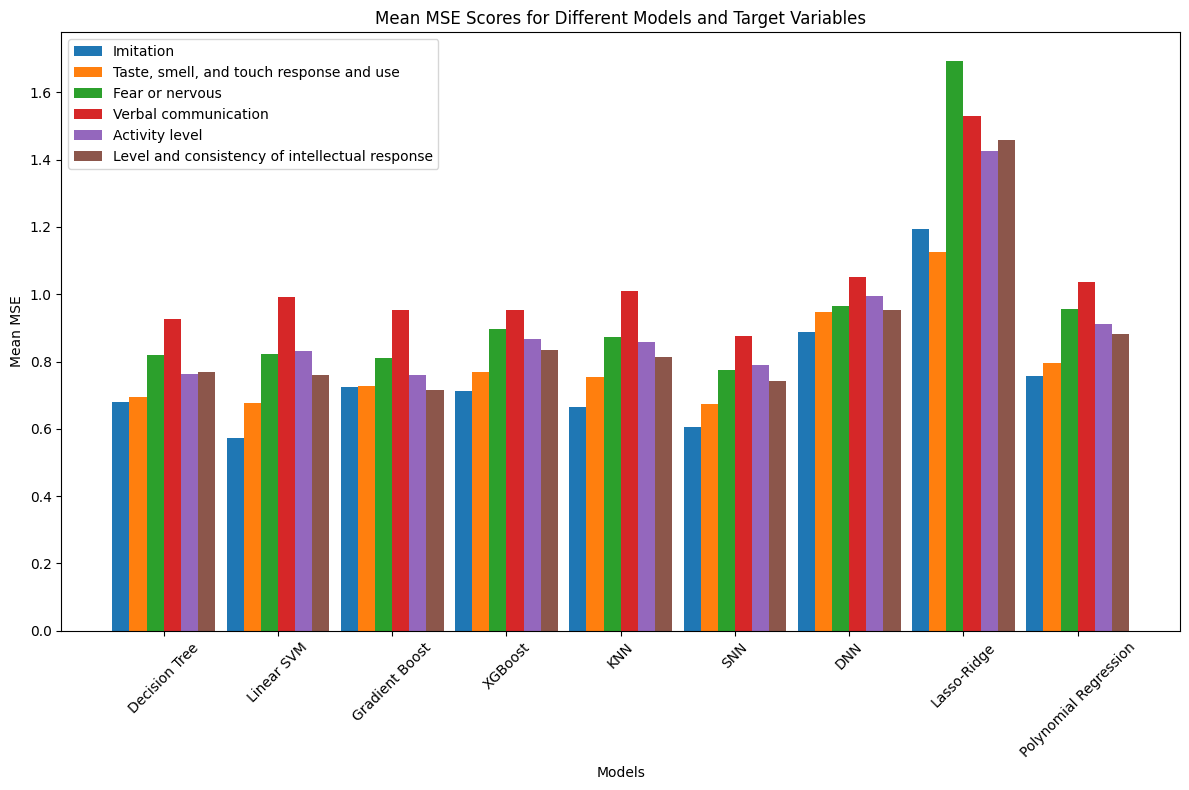

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their MSE scores
models = ['Decision Tree', 'Linear SVM', 'Gradient Boost', 'XGBoost', 'KNN', 'SNN', 'DNN', 'Lasso-Ridge', 'Polynomial Regression']

# Define MSE scores for each target variable and model
mse_scores = {
    'Imitation': [mean_mse_imitation_DT, mean_mse_imitation_linear, mean_mse_imitation_gb, mean_mse_imitation_xgb,
                  mean_mse_imitation_knn, mean_mse_imitation_snn, mean_mse_imitation_dnn, mean_mse_imitation_LR,
                  np.mean(mse_scores_imitation)],
    'Taste, smell, and touch response and use': [mean_mse_response_DT, mean_mse_response_linear, mean_mse_response_gb, mean_mse_response_xgb,
                                                 mean_mse_response_knn, mean_mse_response_snn, mean_mse_response_dnn, mean_mse_response_LR,
                                                 np.mean(mse_scores_response)],
    'Fear or nervous': [mean_mse_fear_DT, mean_mse_fear_linear, mean_mse_fear_gb, mean_mse_fear_xgb,
                        mean_mse_fear_knn, mean_mse_fear_snn, mean_mse_fear_dnn, mean_mse_fear_LR,
                        np.mean(mse_scores_fear)],
    'Verbal communication': [mean_mse_verbal_DT, mean_mse_verbal_linear, mean_mse_verbal_gb, mean_mse_verbal_xgb,
                             mean_mse_verbal_knn, mean_mse_verbal_snn, mean_mse_verbal_dnn, mean_mse_verbal_LR,
                             np.mean(mse_scores_verbal)],
    'Activity level': [mean_mse_activity_DT, mean_mse_activity_linear, mean_mse_activity_gb, mean_mse_activity_xgb,
                       mean_mse_activity_knn, mean_mse_activity_snn, mean_mse_activity_dnn, mean_mse_activity_LR,
                       np.mean(mse_scores_activity)],
    'Level and consistency of intellectual response': [mean_mse_level_DT, mean_mse_level_linear, mean_mse_level_gb, mean_mse_level_xgb,
                                                       mean_mse_level_knn, mean_mse_level_snn, mean_mse_level_dnn, mean_mse_level_LR,
                                                       np.mean(mse_scores_level)]
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Define the width of the bars
bar_width = 0.15

# Define the position of each bar on the x-axis
r = np.arange(len(models))

# Plot each target variable's MSE scores for different models
for i, (target, scores) in enumerate(mse_scores.items()):
    ax.bar(r + i * bar_width, scores, width=bar_width, label=target)

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Mean MSE')
ax.set_title('Mean MSE Scores for Different Models and Target Variables')
ax.legend()

# Set x-axis ticks and labels
plt.xticks(r + (len(mse_scores) - 1) * bar_width / 2, models, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


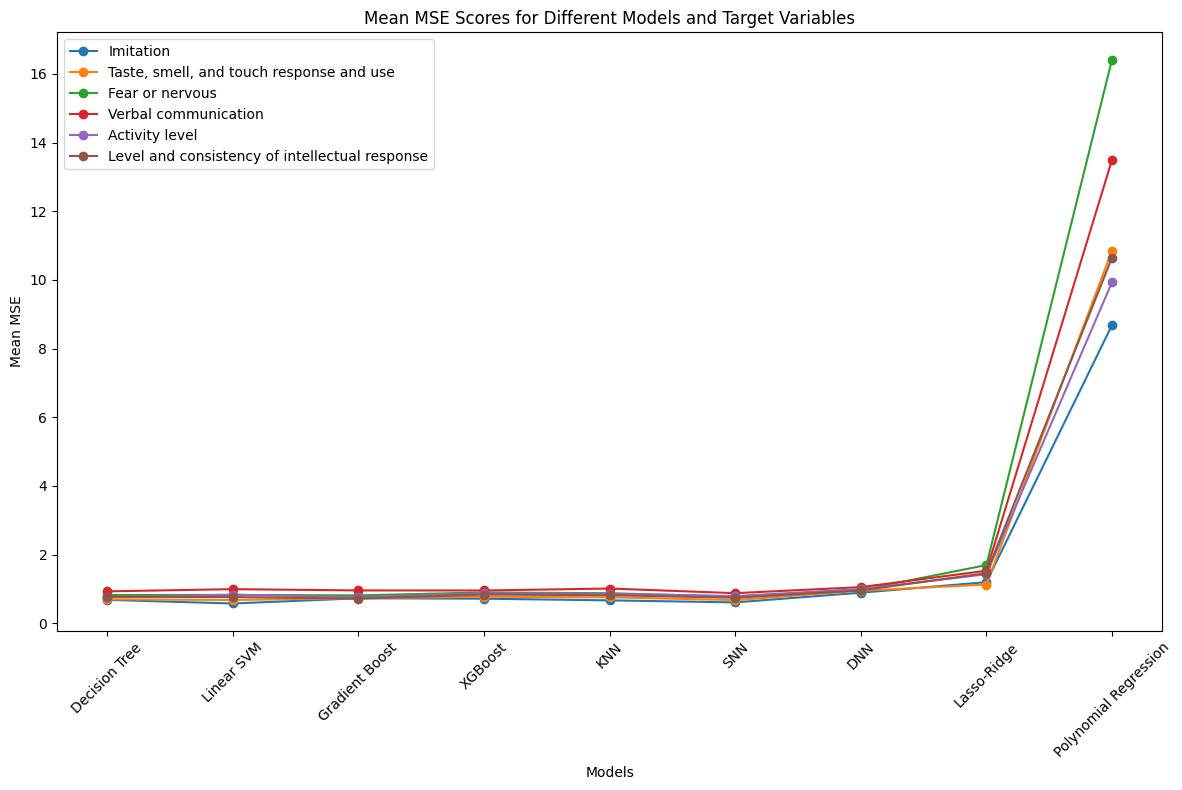

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their MSE scores
models = ['Decision Tree', 'Linear SVM', 'Gradient Boost', 'XGBoost', 'KNN', 'SNN', 'DNN', 'Lasso-Ridge', 'Polynomial Regression']
mse_scores_imitation = [mean_mse_imitation_DT, mean_mse_imitation_linear, mean_mse_imitation_gb, mean_mse_imitation_xgb,
                        mean_mse_imitation_knn, mean_mse_imitation_snn, mean_mse_imitation_dnn, mean_mse_imitation_LR,
                        np.mean(mse_scores_imitation)]
mse_scores_response = [mean_mse_response_DT, mean_mse_response_linear, mean_mse_response_gb, mean_mse_response_xgb,
                       mean_mse_response_knn, mean_mse_response_snn, mean_mse_response_dnn, mean_mse_response_LR,
                       np.mean(mse_scores_response)]
mse_scores_fear = [mean_mse_fear_DT, mean_mse_fear_linear, mean_mse_fear_gb, mean_mse_fear_xgb,
                   mean_mse_fear_knn, mean_mse_fear_snn, mean_mse_fear_dnn, mean_mse_fear_LR,
                   np.mean(mse_scores_fear)]
mse_scores_verbal = [mean_mse_verbal_DT, mean_mse_verbal_linear, mean_mse_verbal_gb, mean_mse_verbal_xgb,
                     mean_mse_verbal_knn, mean_mse_verbal_snn, mean_mse_verbal_dnn, mean_mse_verbal_LR,
                     np.mean(mse_scores_verbal)]
mse_scores_activity = [mean_mse_activity_DT, mean_mse_activity_linear, mean_mse_activity_gb, mean_mse_activity_xgb,
                       mean_mse_activity_knn, mean_mse_activity_snn, mean_mse_activity_dnn, mean_mse_activity_LR,
                       np.mean(mse_scores_activity)]
mse_scores_level = [mean_mse_level_DT, mean_mse_level_linear, mean_mse_level_gb, mean_mse_level_xgb,
                    mean_mse_level_knn, mean_mse_level_snn, mean_mse_level_dnn, mean_mse_level_LR,
                    np.mean(mse_scores_level)]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the MSE scores for each target variable and model
ax.plot(models, mse_scores_imitation, marker='o', label='Imitation')
ax.plot(models, mse_scores_response, marker='o', label='Taste, smell, and touch response and use')
ax.plot(models, mse_scores_fear, marker='o', label='Fear or nervous')
ax.plot(models, mse_scores_verbal, marker='o', label='Verbal communication')
ax.plot(models, mse_scores_activity, marker='o', label='Activity level')
ax.plot(models, mse_scores_level, marker='o', label='Level and consistency of intellectual response')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Mean MSE')
ax.set_title('Mean MSE Scores for Different Models and Target Variables')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models
models = ['Decision Tree', 'Linear SVM', 'Gradient Boost', 'XGBoost', 'KNN', 'SNN', 'DNN', 'Lasso-Ridge', 'Polynomial Regression']

# Define MSE scores for each target variable and model
imitation_mse = [mean_mse_imitation_DT, mean_mse_imitation_linear, mean_mse_imitation_gb, mean_mse_imitation_xgb,
                 mean_mse_imitation_knn, mean_mse_imitation_snn, mean_mse_imitation_dnn, mean_mse_imitation_LR, mean_mse_imitation_PR]
response_mse = [mean_mse_response_DT, mean_mse_response_linear, mean_mse_response_gb, mean_mse_response_xgb,
                mean_mse_response_knn, mean_mse_response_snn, mean_mse_response_dnn, mean_mse_response_LR, mean_mse_response_PR]
fear_mse = [mean_mse_fear_DT, mean_mse_fear_linear, mean_mse_fear_gb, mean_mse_fear_xgb,
            mean_mse_fear_knn, mean_mse_fear_snn, mean_mse_fear_dnn, mean_mse_fear_LR, mean_mse_fear_PR]
verbal_mse = [mean_mse_verbal_DT, mean_mse_verbal_linear, mean_mse_verbal_gb, mean_mse_verbal_xgb,
              mean_mse_verbal_knn, mean_mse_verbal_snn, mean_mse_verbal_dnn, mean_mse_verbal_LR, mean_mse_verbal_PR]
activity_mse = [mean_mse_activity_DT, mean_mse_activity_linear, mean_mse_activity_gb, mean_mse_activity_xgb,
                mean_mse_activity_knn, mean_mse_activity_snn, mean_mse_activity_dnn, mean_mse_activity_LR, mean_mse_activity_PR]
level_mse = [mean_mse_level_DT, mean_mse_level_linear, mean_mse_level_gb, mean_mse_level_xgb,
             mean_mse_level_knn, mean_mse_level_snn, mean_mse_level_dnn, mean_mse_level_LR, mean_mse_level_PR]

# Define the number of models and target variables
num_models = len(models)
num_targets = 6

# Define the width of the bars
bar_width = 0.1

# Set the positions of the bars on the x-axis
r = np.arange(num_models)

# Create subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each target variable's MSE scores for different models
for i in range(num_targets):
    ax.bar(r + i * bar_width, [imitation_mse[i], response_mse[i], fear_mse[i], verbal_mse[i], activity_mse[i], level_mse[i]],
           width=bar_width, label=f'Target {i+1}')

# Add xticks on the middle of the group bars
ax.set_xticks(r + (num_targets * bar_width) / 2)
ax.set_xticklabels(models)

# Add labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Mean MSE', fontsize=14)
ax.set_title('Mean MSE Scores for Different Models and Target Variables', fontsize=16)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'mean_mse_imitation_snn' is not defined